In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("C:/Users/shahi/OneDrive/Documents/Datathon practice/techparva3-datathon (3)/train.csv")

In [6]:
df.head()

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date_year,issue_date_month,issue_date_day,issue_date_weekday,issue_date_hour
0,CA,INDIVIDUAL,4 years,"Windsor Solutions, Inc.",D,RENT,2021-08-07,2021-07-15,2021-07-12,Current,...,62.006774,0.161206,9586.945180,1.953600,NaN,2021,8,7,5,0
1,PA,INDIVIDUAL,3 years,Grant & Eisenhofer,C,MORTGAGE,2021-04-09,2021-05-16,2021-03-13,Charged Off,...,373.547998,0.117188,2213.200815,22.458280,12901.399781,2021,4,9,4,0
2,DC,INDIVIDUAL,6 years,VALLEY PLUMBING COMPANY,B,RENT,2021-07-10,2021-05-16,2021-03-12,Fully Paid,...,529.631006,0.089163,15608.890161,NaN,10082.118704,2021,7,10,5,0
3,WI,INDIVIDUAL,7 years,Housing Investments Inc,G,MORTGAGE,2021-10-11,2021-04-16,2021-07-14,Fully Paid,...,1057.386266,0.171302,16700.391717,2.814647,NaN,2021,10,11,0,0
4,NY,INDIVIDUAL,10+ years,Massage Envy,C,MORTGAGE,2021-01-10,2021-10-12,2021-01-14,Charged Off,...,510.555677,0.091857,4109.600739,NaN,13485.994361,2021,1,10,6,0


In [7]:
df.nunique()

address_state               50
application_type             1
emp_length                  11
emp_title                21328
grade                        7
home_ownership               5
issue_date                  63
last_credit_pull_date      105
last_payment_date          102
loan_status                  3
next_payment_date          102
member_id                75001
purpose                     14
term                         2
verification_status          3
annual_income            67501
dti                      63751
installment              71251
int_rate                 60001
loan_amount              67501
total_acc                67501
total_payment            56251
issue_date_year              1
issue_date_month            12
issue_date_day              12
issue_date_weekday           7
issue_date_hour              1
dtype: int64

In [8]:
df['emp_length'].unique()

array(['4 years', '3 years', '6 years', '7 years', '10+ years',
       '< 1 year', '5 years', '8 years', '2 years', '1 year', '9 years'],
      dtype=object)

In [9]:
columns_to_drop = ['application_type','emp_title', 'issue_date_year', 'issue_date_hour']

In [10]:
df = df.drop(columns = columns_to_drop)

In [11]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shahi\AppData\Local\Temp\ipykernel_32644\290762630.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)


In [12]:
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'])
df['issue_date'] = pd.to_datetime(df['issue_date'])
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'])

In [13]:
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'])

In [14]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [15]:
df['term'] = df['term'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shahi\AppData\Local\Temp\ipykernel_32644\1059289394.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['term'] = df['term'].str.extract('(\d+)').astype(float)


In [16]:
df['last_credit_pull_date_month'] = df['last_credit_pull_date'].dt.month
df['last_credit_pull_date_day'] = df['last_credit_pull_date'].dt.day
df['next_payment_date_month'] = df['next_payment_date'].dt.month
df['next_payment_date_day'] = df['next_payment_date'].dt.day
df['last_payment_date_month'] = df['last_payment_date'].dt.month
df['last_payment_date_day'] = df['last_payment_date'].dt.day

In [17]:
columns_to_drop1 = ['last_credit_pull_date', 'next_payment_date', 'last_payment_date', 'issue_date', 'member_id']
df = df.drop(columns = columns_to_drop1)

In [18]:
df.sample(5)

,address_state,emp_length,grade,home_ownership,loan_status,purpose,term,verification_status,annual_income,dti,...,total_payment,issue_date_month,issue_date_day,issue_date_weekday,last_credit_pull_date_month,last_credit_pull_date_day,next_payment_date_month,next_payment_date_day,last_payment_date_month,last_payment_date_day
66015,NJ,10.0,B,RENT,Fully Paid,other,60.0,Not Verified,71059.008761,0.220135,...,10841.485417,5,10,0,4,16,11,12,1,10
28659,IL,1.0,E,RENT,Fully Paid,Debt consolidation,60.0,Verified,60547.311611,0.120769,...,-10386.168197,2,9,1,3,14,1,10,5,16
4443,WA,7.0,F,RENT,Fully Paid,home improvement,36.0,Verified,126760.371901,0.169244,...,35281.276355,1,11,0,8,13,6,16,3,13
47395,NJ,1.0,A,MORTGAGE,Fully Paid,other,36.0,Verified,77167.551470,0.142589,...,6341.006079,3,11,3,2,13,10,12,2,14
3367,NJ,7.0,F,MORTGAGE,Fully Paid,Debt consolidation,60.0,Source Verified,133502.564934,0.240092,...,23267.537735,4,11,6,12,13,4,12,5,12


In [19]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [20]:
df.isnull().mean()

address_state                  0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
loan_status                    0.000000
purpose                        0.000000
term                           0.000000
verification_status            0.000000
annual_income                  0.099999
dti                            0.149998
installment                    0.049999
int_rate                       0.199997
loan_amount                    0.099999
total_acc                      0.099999
total_payment                  0.249997
issue_date_month               0.000000
issue_date_day                 0.000000
issue_date_weekday             0.000000
last_credit_pull_date_month    0.000000
last_credit_pull_date_day      0.000000
next_payment_date_month        0.000000
next_payment_date_day          0.000000
last_payment_date_month        0.000000
last_payment_date_day          0.000000
dtype: float64

In [21]:
columns_to_impute = (['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment'])

In [22]:
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(columns=['grade'])
y= df['grade']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer

In [27]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
columns_to_impute = (['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment'])
X_train[columns_to_impute] = imp.fit_transform(X_train[columns_to_impute])
X_test[columns_to_impute] = imp.transform(X_test[columns_to_impute])

In [28]:
transformer = ColumnTransformer(transformers=[('tnf1', RobustScaler(), ['emp_length', 'term', 'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'issue_date_month',	'issue_date_day','issue_date_weekday','last_credit_pull_date_month','last_credit_pull_date_day','next_payment_date_month','next_payment_date_day','last_payment_date_month','last_payment_date_day']),
    ('tnf2',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='infrequent_if_exist', min_frequency= 1000),['home_ownership', 'loan_status', 'purpose', 'verification_status', 'address_state'])
],remainder='passthrough')

In [29]:
X_train= transformer.fit_transform(X_train)

In [30]:
X_test = transformer.transform(X_test)

C:\Users\shahi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [31]:
le = LabelEncoder()

In [32]:
y_train = le.fit_transform(y_train)
y_test= le.transform(y_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [35]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.4561695886940871

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      2166
           1       0.40      0.39      0.39      2106
           2       0.42      0.36      0.39      2163
           3       0.35      0.38      0.37      2108
           4       0.36      0.29      0.32      2240
           5       0.37      0.35      0.36      2092
           6       0.53      0.61      0.57      2126

    accuracy                           0.46     15001
   macro avg       0.45      0.46      0.45     15001
weighted avg       0.45      0.46      0.45     15001



In [38]:
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
accuracy_score(y_test,y_pred_gb)

0.47370175321645225

In [39]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      2166
           1       0.40      0.44      0.42      2106
           2       0.47      0.34      0.39      2163
           3       0.38      0.43      0.40      2108
           4       0.38      0.35      0.36      2240
           5       0.40      0.37      0.39      2092
           6       0.55      0.60      0.57      2126

    accuracy                           0.47     15001
   macro avg       0.47      0.47      0.47     15001
weighted avg       0.47      0.47      0.47     15001



In [40]:
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test,y_pred_lr)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67      2166
           1       0.40      0.34      0.37      2106
           2       0.34      0.31      0.32      2163
           3       0.33      0.37      0.35      2108
           4       0.36      0.36      0.36      2240
           5       0.40      0.34      0.37      2092
           6       0.54      0.61      0.57      2126

    accuracy                           0.44     15001
   macro avg       0.43      0.44      0.43     15001
weighted avg       0.43      0.44      0.43     15001



In [41]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
import seaborn as sns

In [42]:
xgb= XGBClassifier()

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_score(y_test,y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      2166
           1       0.40      0.41      0.40      2106
           2       0.45      0.37      0.41      2163
           3       0.37      0.40      0.39      2108
           4       0.41      0.35      0.37      2240
           5       0.44      0.43      0.44      2092
           6       0.59      0.65      0.62      2126

    accuracy                           0.49     15001
   macro avg       0.48      0.49      0.48     15001
weighted avg       0.48      0.49      0.48     15001



In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.46      0.73      0.57      2166
           1       0.26      0.30      0.28      2106
           2       0.29      0.25      0.27      2163
           3       0.24      0.22      0.23      2108
           4       0.28      0.23      0.25      2240
           5       0.31      0.31      0.31      2092
           6       0.48      0.34      0.40      2126

    accuracy                           0.34     15001
   macro avg       0.33      0.34      0.33     15001
weighted avg       0.33      0.34      0.33     15001



In [44]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [45]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
             }

In [46]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [47]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [48]:
rf_grid.best_params_

{'n_estimators': 120,
 'max_samples': 0.75,
 'max_features': 0.2,
 'max_depth': None}

In [49]:
rf_grid.best_score_

0.45466666666666666

In [50]:
best_rf = RandomForestClassifier(n_estimators= 100,
 max_samples= 0.75,
 max_features= 0.75,
 max_depth= None)
rf.fit(X_train,y_train)
y_pred_best_rf = rf.predict(X_test)
accuracy_score(y_test,y_pred_best_rf)

0.45776948203453105

In [51]:
params={
 "learning_rate"    : [ 0.05, 0.15, 0.20,0.25,0.3] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.2, 0.3, 0.4],
 "colsample_bytree" : [ 0.4, 0.5, 0.7 ]
    
}

In [52]:
xgb_grid = RandomizedSearchCV(estimator = xgb, 
                       param_distributions = params, 
                       cv = 3, 
                       verbose=2, 
                       n_jobs = -1)

In [53]:
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.4, 0.5, 0.7],
                                        'gamma': [0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.15, 0.2, 0.25,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 8],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=2)

In [54]:
xgb_grid.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [55]:
xgb_grid.best_score_

0.48246666666666665

In [56]:
best_xgb= XGBClassifier(min_child_weight= 7,
 max_depth= 5,
 learning_rate= 0.32,
 gamma= 0.3,
 colsample_bytree= 0.5 )
best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)
print(accuracy_score(y_test,y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))

0.48850076661555897
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      2166
           1       0.41      0.41      0.41      2106
           2       0.47      0.38      0.42      2163
           3       0.38      0.42      0.40      2108
           4       0.41      0.33      0.36      2240
           5       0.43      0.42      0.42      2092
           6       0.58      0.64      0.61      2126

    accuracy                           0.49     15001
   macro avg       0.48      0.49      0.48     15001
weighted avg       0.48      0.49      0.48     15001



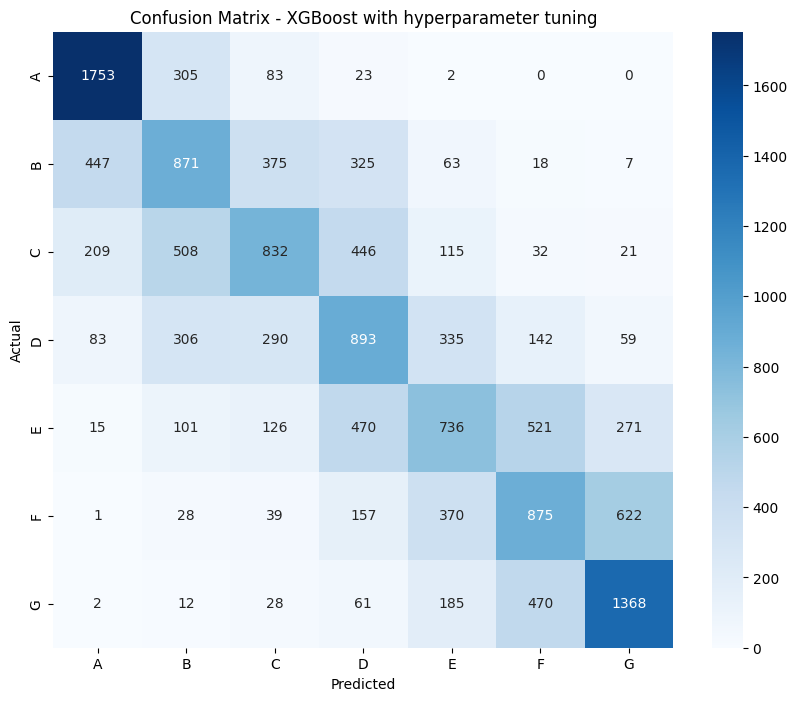

In [57]:
m = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost with hyperparameter tuning')
plt.show()